In [133]:
import os
import pandas as pd
from datetime import datetime
import dateutil.parser
import numpy as np
from scipy import stats

Reading in the dataset

In [134]:
stockDF = pd.read_csv('/content/drive/MyDrive/Berkeley/NVDA.csv')

In [140]:
stockDF.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,STOCHk_14_3_3,STOCHd_14_3_3,...,BBP_5_2.0,FWMA_10,WILLR_14,ISA_9,ISB_26,ITS_9,IKS_26,ICS_26,OBV,AD
0,1999-01-22 00:00:00-05:00,0.040122,0.044779,0.035585,0.037615,2714688000,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.041794,2.714688e+09,-1.515741e+09
1,1999-01-25 00:00:00-05:00,0.040600,0.042033,0.037615,0.041556,510480000,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.038928,3.225168e+09,-1.115475e+09
2,1999-01-26 00:00:00-05:00,0.042033,0.042869,0.037734,0.038331,343200000,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.038092,2.881968e+09,-1.378866e+09
3,1999-01-27 00:00:00-05:00,0.038451,0.039406,0.036301,0.038212,244368000,0.0,0.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.040242,2.637600e+09,-1.322429e+09
4,1999-01-28 00:00:00-05:00,0.038212,0.038451,0.037854,0.038092,227520000,0.0,0.0,NaN,NaN,...,0.382024,NaN,NaN,NaN,NaN,NaN,NaN,0.040839,2.410080e+09,-1.368213e+09


In [139]:
stockDF.describe()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,STOCHk_14_3_3,STOCHd_14_3_3,RSI_14,...,BBP_5_2.0,FWMA_10,WILLR_14,ISA_9,ISB_26,ITS_9,IKS_26,ICS_26,OBV,AD
count,6519.000000,6519.000000,6519.000000,6519.000000,6.519000e+03,6519.000000,6519.000000,6504.000000,6502.000000,6505.000000,...,6515.000000,6510.000000,6506.000000,6468.000000,6442.000000,6511.000000,6494.000000,6493.000000,6.519000e+03,6.519000e+03
mean,8.020093,8.165426,7.859800,8.019078,6.011666e+08,0.000028,0.003298,55.249787,55.256394,53.659832,...,0.525701,7.998559,-44.760957,7.319923,7.029460,7.927898,7.765403,8.051034,6.304518e+10,4.250518e+09
std,21.933909,22.318302,21.477293,21.911962,4.310678e+08,0.000359,0.141323,28.777906,27.976263,12.863010,...,0.289974,21.829483,30.792249,19.615406,18.497342,21.621990,21.030985,21.949964,4.695740e+10,2.740060e+10
min,0.032003,0.032600,0.030569,0.031286,1.968000e+07,0.000000,0.000000,0.897614,1.436657,13.025450,...,0.001766,0.032197,-100.000000,0.032928,0.035704,0.032659,0.033197,0.031286,-3.288085e+10,-4.061282e+10
25%,0.256401,0.263662,0.249906,0.256363,3.406040e+08,0.000000,0.000000,28.563801,29.472183,44.456678,...,0.257349,0.257352,-72.618881,0.255843,0.258465,0.257357,0.258446,0.258847,2.892337e+10,-1.554332e+10
50%,0.435343,0.441577,0.428000,0.435343,5.030360e+08,0.000000,0.000000,58.690440,58.728880,53.969908,...,0.552125,0.435371,-41.556720,0.434354,0.429803,0.434373,0.435310,0.436762,5.407756e+10,-6.813211e+09
75%,4.453363,4.502290,4.390022,4.461058,7.320360e+08,0.000000,0.000000,81.986328,81.199449,62.747636,...,0.789045,4.454813,-16.429651,4.339996,4.247920,4.422878,4.373019,4.480048,1.018728e+11,2.720408e+10
max,149.339720,152.879470,146.249911,148.869751,9.230856e+09,0.010000,10.000000,99.440797,98.434083,91.420713,...,0.999637,146.570243,0.000000,138.360468,125.347041,145.010006,142.490188,148.869751,1.638066e+11,6.994093e+10


,Open,High,Low,Close,Volume,Dividends,Stock Splits,STOCHk_14_3_3,STOCHd_14_3_3,RSI_14,...,BBP_5_2.0,FWMA_10,WILLR_14,ISA_9,ISB_26,ITS_9,IKS_26,ICS_26,OBV,AD
count,6519.000000,6519.000000,6519.000000,6519.000000,6.519000e+03,6519.000000,6519.000000,6504.000000,6502.000000,6505.000000,...,6515.000000,6510.000000,6506.000000,6468.000000,6442.000000,6511.000000,6494.000000,6493.000000,6.519000e+03,6.519000e+03
mean,8.020093,8.165426,7.859800,8.019078,6.011666e+08,0.000028,0.003298,55.249787,55.256394,53.659832,...,0.525701,7.998559,-44.760957,7.319923,7.029460,7.927898,7.765403,8.051034,6.304518e+10,4.250518e+09
std,21.933909,22.318302,21.477293,21.911962,4.310678e+08,0.000359,0.141323,28.777906,27.976263,12.863010,...,0.289974,21.829483,30.792249,19.615406,18.497342,21.621990,21.030985,21.949964,4.695740e+10,2.740060e+10
min,0.032003,0.032600,0.030569,0.031286,1.968000e+07,0.000000,0.000000,0.897614,1.436657,13.025450,...,0.001766,0.032197,-100.000000,0.032928,0.035704,0.032659,0.033197,0.031286,-3.288085e+10,-4.061282e+10
25%,0.256401,0.263662,0.249906,0.256363,3.406040e+08,0.000000,0.000000,28.563801,29.472183,44.456678,...,0.257349,0.257352,-72.618881,0.255843,0.258465,0.257357,0.258446,0.258847,2.892337e+10,-1.554332e+10
50%,0.435343,0.441577,0.428000,0.435343,5.030360e+08,0.000000,0.000000,58.690440,58.728880,53.969908,...,0.552125,0.435371,-41.556720,0.434354,0.429803,0.434373,0.435310,0.436762,5.407756e+10,-6.813211e+09
75%,4.453363,4.502290,4.390022,4.461058,7.320360e+08,0.000000,0.000000,81.986328,81.199449,62.747636,...,0.789045,4.454813,-16.429651,4.339996,4.247920,4.422878,4.373019,4.480048,1.018728e+11,2.720408e+10
max,149.339720,152.879470,146.249911,148.869751,9.230856e+09,0.010000,10.000000,99.440797,98.434083,91.420713,...,0.999637,146.570243,0.000000,138.360468,125.347041,145.010006,142.490188,148.869751,1.638066e+11,6.994093e+10


# Checking for missing data

In [111]:
stockDF.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Volume,0
Dividends,0
Stock Splits,0
STOCHk_14_3_3,15
STOCHd_14_3_3,17


There are a lot of missing data from the NVIDIA dataset. Since this is stock data, which is a time-series data, a popular approach would to use forward fill since it gets the previous known data and preserves the trends in the data.
Forward fill only works if the missing data is not the first set of data in the dataset. If the missing data is the first rows, a reasonable approach would be to use backward fill which would get the earliest available data to fill the gaps. I do forward fill firs then backward fill

In [112]:
stockDF = stockDF.ffill()
stockDF = stockDF.bfill()

# DateTime to Date Conversion

In [113]:
stockDF['Date'] = pd.to_datetime(stockDF['Date'],utc=True)

In [114]:
stockDF['Date_Only'] = stockDF['Date'].dt.date

In [115]:
stockDF.drop(columns=['Date'],inplace=True)

In [116]:
stockDF.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits,STOCHk_14_3_3,STOCHd_14_3_3,RSI_14,...,FWMA_10,WILLR_14,ISA_9,ISB_26,ITS_9,IKS_26,ICS_26,OBV,AD,Date_Only
0,0.040122,0.044779,0.035585,0.037615,2714688000,0.0,0.0,43.786937,58.270208,52.766223,...,0.036071,-85.713198,0.04266,0.041615,0.038928,0.041615,0.041794,2.714688e+09,-1.515741e+09,1999-01-22
1,0.040600,0.042033,0.037615,0.041556,510480000,0.0,0.0,43.786937,58.270208,52.766223,...,0.036071,-85.713198,0.04266,0.041615,0.038928,0.041615,0.038928,3.225168e+09,-1.115475e+09,1999-01-25
2,0.042033,0.042869,0.037734,0.038331,343200000,0.0,0.0,43.786937,58.270208,52.766223,...,0.036071,-85.713198,0.04266,0.041615,0.038928,0.041615,0.038092,2.881968e+09,-1.378866e+09,1999-01-26
3,0.038451,0.039406,0.036301,0.038212,244368000,0.0,0.0,43.786937,58.270208,52.766223,...,0.036071,-85.713198,0.04266,0.041615,0.038928,0.041615,0.040242,2.637600e+09,-1.322429e+09,1999-01-27
4,0.038212,0.038451,0.037854,0.038092,227520000,0.0,0.0,43.786937,58.270208,52.766223,...,0.036071,-85.713198,0.04266,0.041615,0.038928,0.041615,0.040839,2.410080e+09,-1.368213e+09,1999-01-28


# Feature Engineering

### Creating separate features for month, day and year

In [117]:
stockDF['dateParsed'] = pd.to_datetime(stockDF['Date_Only'])
stockDF['year'] = stockDF['dateParsed'].dt.year
stockDF['month'] = stockDF['dateParsed'].dt.month
stockDF['day'] = stockDF['dateParsed'].dt.day
stockDF['quarter'] = stockDF['dateParsed'].dt.quarter
# stockDF.drop(columns=['dateParsed','Date_Only'],inplace=True)

In [118]:
stockDF

,Open,High,Low,Close,Volume,Dividends,Stock Splits,STOCHk_14_3_3,STOCHd_14_3_3,RSI_14,...,IKS_26,ICS_26,OBV,AD,Date_Only,dateParsed,year,month,day,quarter
0,0.040122,0.044779,0.035585,0.037615,2714688000,0.0,0.0,43.786937,58.270208,52.766223,...,0.041615,0.041794,2.714688e+09,-1.515741e+09,1999-01-22,1999-01-22,1999,1,22,1
1,0.040600,0.042033,0.037615,0.041556,510480000,0.0,0.0,43.786937,58.270208,52.766223,...,0.041615,0.038928,3.225168e+09,-1.115475e+09,1999-01-25,1999-01-25,1999,1,25,1
2,0.042033,0.042869,0.037734,0.038331,343200000,0.0,0.0,43.786937,58.270208,52.766223,...,0.041615,0.038092,2.881968e+09,-1.378866e+09,1999-01-26,1999-01-26,1999,1,26,1
3,0.038451,0.039406,0.036301,0.038212,244368000,0.0,0.0,43.786937,58.270208,52.766223,...,0.041615,0.040242,2.637600e+09,-1.322429e+09,1999-01-27,1999-01-27,1999,1,27,1
4,0.038212,0.038451,0.037854,0.038092,227520000,0.0,0.0,43.786937,58.270208,52.766223,...,0.041615,0.040839,2.410080e+09,-1.368213e+09,1999-01-28,1999-01-28,1999,1,28,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6514,137.360001,140.169998,135.210007,139.309998,184905200,0.0,0.0,28.162572,36.724356,48.915180,...,142.335197,130.389999,1.630129e+11,6.963456e+10,2024-12-11,2024-12-11,2024,12,11,4
6515,137.080002,138.440002,135.800003,137.339996,159211400,0.0,0.0,29.111055,30.127867,46.402587,...,142.335197,130.389999,1.628537e+11,6.966110e+10,2024-12-12,2024-12-12,2024,12,12,4
6516,138.940002,139.600006,132.539993,134.250000,231514900,0.0,0.0,29.485599,28.919742,42.697825,...,142.335197,130.389999,1.626222e+11,6.954173e+10,2024-12-13,2024-12-13,2024,12,13,4
6517,134.179993,134.399994,130.419998,132.000000,237951100,0.0,0.0,20.867842,26.488165,40.182117,...,141.649734,130.389999,1.623842e+11,6.949271e+10,2024-12-16,2024-12-16,2024,12,16,4


## Calculating Price Gaps

In [119]:
stockDF['priceGap'] = (stockDF['Close'] - stockDF['Open'].shift(1)) / stockDF['Close'].shift(1)

In [120]:
stockDF['daily_return'] = stockDF['Close'].pct_change() #getting daily returns
stockDF['log_return'] = np.log(stockDF['Close'] / stockDF['Close'].shift(1)) #getting log returns

## Looking at the volatiility of the market data between 5, 10, 20, 30 day intervals

In [121]:
for window in [5, 10, 20, 30]:
      stockDF[f'volatility_{window}d'] = stockDF['log_return'].rolling(window).std() * np.sqrt(252)

## Calculating volume changes

In [122]:
stockDF['volume_change'] = stockDF['Volume'].pct_change()
stockDF['volume_ma_ration_5'] = stockDF['Volume'] / stockDF['Volume'].rolling(5).mean()
stockDF['volume_ma_ration_10'] = stockDF['Volume'] / stockDF['Volume'].rolling(10).mean()

## Calculating volume relationship with price

In [123]:
stockDF['volume_price_ratio'] = stockDF['Close'] / stockDF['Volume']

## Interaction between RSI and Stochastic

In [124]:
if 'RSI_14' in stockDF.columns and 'STOCHk_14_3_3' in stockDF.columns:
        stockDF['rsi_stoch_diff'] = stockDF['RSI_14'] - stockDF['STOCHk_14_3_3']
        stockDF['rsi_stoch_ratio'] = stockDF['RSI_14'] / np.where(stockDF['STOCHk_14_3_3'] == 0, 0.001, stockDF['STOCHk_14_3_3'])


## Interaction with Bollinger Bonds

In [125]:
if all(col in stockDF.columns for col in ['BBL_5_2.0', 'BBM_5_2.0', 'BBU_5_2.0']):
        stockDF['bb_lower_dist'] = (stockDF['Close'] - stockDF['BBL_5_2.0']) / stockDF['BBL_5_2.0']
        stockDF['bb_upper_dist'] = (stockDF['BBU_5_2.0'] - stockDF['Close']) / stockDF['Close']
        stockDF['bb_mid_dist'] = (stockDF['Close'] - stockDF['BBM_5_2.0']) / stockDF['BBM_5_2.0']

## MACD crossover signals

In [126]:
if all(col in stockDF.columns for col in ['MACD_12_26_9', 'MACDs_12_26_9']):
      stockDF['macd_crossover'] = np.where(
          (stockDF['MACD_12_26_9'] > stockDF['MACDs_12_26_9']) &
          (stockDF['MACD_12_26_9'].shift(1) <= stockDF['MACDs_12_26_9'].shift(1)),
          1, 0
      )
      stockDF['macd_crossunder'] = np.where(
          (stockDF['MACD_12_26_9'] < stockDF['MACDs_12_26_9']) &
          (stockDF['MACD_12_26_9'].shift(1) >= stockDF['MACDs_12_26_9'].shift(1)),
          1, 0
      )

## RSI overbought/oversold signals

In [127]:
if 'RSI_14' in stockDF.columns:
        stockDF['rsi_overbought'] = np.where(stockDF['RSI_14'] > 70, 1, 0)
        stockDF['rsi_oversold'] = np.where(stockDF['RSI_14'] < 30, 1, 0)

In [128]:
stockDF

,Open,High,Low,Close,Volume,Dividends,Stock Splits,STOCHk_14_3_3,STOCHd_14_3_3,RSI_14,...,volume_price_ratio,rsi_stoch_diff,rsi_stoch_ratio,bb_lower_dist,bb_upper_dist,bb_mid_dist,macd_crossover,macd_crossunder,rsi_overbought,rsi_oversold
0,0.040122,0.044779,0.035585,0.037615,2714688000,0.0,0.0,43.786937,58.270208,52.766223,...,1.385617e-11,8.979286,1.205068,0.047054,0.105881,-0.029570,0,0,0,0
1,0.040600,0.042033,0.037615,0.041556,510480000,0.0,0.0,43.786937,58.270208,52.766223,...,8.140552e-11,8.979286,1.205068,0.156747,0.001011,0.072096,0,0,0,0
2,0.042033,0.042869,0.037734,0.038331,343200000,0.0,0.0,43.786937,58.270208,52.766223,...,1.116883e-10,8.979286,1.205068,0.066991,0.085217,-0.011092,0,0,0,0
3,0.038451,0.039406,0.036301,0.038212,244368000,0.0,0.0,43.786937,58.270208,52.766223,...,1.563715e-10,8.979286,1.205068,0.063672,0.088603,-0.014168,0,0,0,0
4,0.038212,0.038451,0.037854,0.038092,227520000,0.0,0.0,43.786937,58.270208,52.766223,...,1.674228e-10,8.979286,1.205068,0.060328,0.092036,-0.017267,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6514,137.360001,140.169998,135.210007,139.309998,184905200,0.0,0.0,28.162572,36.724356,48.915180,...,7.534131e-07,20.752608,1.736886,0.044723,0.054696,-0.005908,0,0,0,0
6515,137.080002,138.440002,135.800003,137.339996,159211400,0.0,0.0,29.111055,30.127867,46.402587,...,8.626266e-07,17.291533,1.593985,0.026848,0.044408,-0.009048,0,0,0,0
6516,138.940002,139.600006,132.539993,134.250000,231514900,0.0,0.0,29.485599,28.919742,42.697825,...,5.798763e-07,13.212226,1.448091,0.009737,0.049956,-0.019758,0,0,0,0
6517,134.179993,134.399994,130.419998,132.000000,237951100,0.0,0.0,20.867842,26.488165,40.182117,...,5.547358e-07,19.314275,1.925552,0.011139,0.065471,-0.026506,0,0,0,0


In [129]:
stockDF = stockDF.ffill()
stockDF = stockDF.bfill()

## Finding outliers

In [130]:
for col in stockDF.select_dtypes(include=['float64', 'int64']).columns:
        # Calculate z-scores
        z_scores = stats.zscore(stockDF[col].dropna())
        z_scores_series = pd.Series(z_scores, index=stockDF[col].dropna().index)
        stockDF[f'{col}_is_outlier'] = 0 #the default is 0
        stockDF.loc[z_scores_series[abs(z_scores_series) > 3].index, f'{col}_is_outlier'] = 1 #I set if the z-score is greater than 3, then it could be an outlier

In [ ]:
stockDF

,Open,High,Low,Close,Volume,Dividends,Stock Splits,STOCHk_14_3_3,STOCHd_14_3_3,RSI_14,...,volume_price_ratio_is_outlier,rsi_stoch_diff_is_outlier,rsi_stoch_ratio_is_outlier,bb_lower_dist_is_outlier,bb_upper_dist_is_outlier,bb_mid_dist_is_outlier,macd_crossover_is_outlier,macd_crossunder_is_outlier,rsi_overbought_is_outlier,rsi_oversold_is_outlier
0,0.040122,0.044779,0.035585,0.037615,2714688000,0.0,0.0,43.786937,58.270208,52.766223,...,0,0,0,0,0,0,0,0,0,0
1,0.040600,0.042033,0.037615,0.041556,510480000,0.0,0.0,43.786937,58.270208,52.766223,...,0,0,0,0,0,0,0,0,0,0
2,0.042033,0.042869,0.037734,0.038331,343200000,0.0,0.0,43.786937,58.270208,52.766223,...,0,0,0,0,0,0,0,0,0,0
3,0.038451,0.039406,0.036301,0.038212,244368000,0.0,0.0,43.786937,58.270208,52.766223,...,0,0,0,0,0,0,0,0,0,0
4,0.038212,0.038451,0.037854,0.038092,227520000,0.0,0.0,43.786937,58.270208,52.766223,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6514,137.360001,140.169998,135.210007,139.309998,184905200,0.0,0.0,28.162572,36.724356,48.915180,...,1,0,0,0,0,0,0,0,0,0
6515,137.080002,138.440002,135.800003,137.339996,159211400,0.0,0.0,29.111055,30.127867,46.402587,...,1,0,0,0,0,0,0,0,0,0
6516,138.940002,139.600006,132.539993,134.250000,231514900,0.0,0.0,29.485599,28.919742,42.697825,...,1,0,0,0,0,0,0,0,0,0
6517,134.179993,134.399994,130.419998,132.000000,237951100,0.0,0.0,20.867842,26.488165,40.182117,...,1,0,0,0,0,0,0,0,0,0


## Scaling Values

In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [ ]:
feature_list = list(stockDF.columns)
feature_list.remove('Close')

In [ ]:
numeric_transformer = Pipeline(steps=[
    ('scaler', RobustScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False))
])

In [ ]:
preprocessor = ColumnTransformer(#main transformer
        transformers=[
            ('num', numeric_transformer, feature_list)
        ])

## Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split, GridSearchCV, TimeSeriesSplit

In [ ]:
X = stockDF.drop(columns=['Close'])
y = stockDF['Close']

Can't use train test split because in time series, data needs to be in order, where in train test split, it is split randomly

In [ ]:
train_size = 0.7
val_size = 0.15

train_idx=int(len(X)*train_size)
val_idx=int(len(X)*(train_size+val_size))

X_train = X.iloc[:train_idx]
y_train = y.iloc[:train_idx]

X_val = X.iloc[train_idx:val_idx]
y_val = y.iloc[train_idx:val_idx]

X_test = X.iloc[val_idx:]
y_test = y.iloc[val_idx:]

## Baseline Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score

In [ ]:
rf_model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor())
])

In [ ]:
 param_grid = {
        'model__n_estimators': [50, 100, 200],
        'model__max_depth': [None,30],
        'model__min_samples_split': [2, 5, 10],
        'model__min_samples_leaf': [2],
        'model__max_features': ['sqrt', 'log2', None]
    }

In [ ]:
tscv = TimeSeriesSplit(n_splits=5)

In [ ]:
rf_grid_search = GridSearchCV(
    estimator=rf_model_pipeline,
    param_grid=param_grid,
    cv=tscv,
    scoring='neg_mean_squared_error',
    verbose=1,
    n_jobs=-1,
    error_score='raise'
)

In [ ]:
rf_grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          RobustScaler()),
                                                                                         ('poly',
                                                                                          PolynomialFeatures(include_bias=False))]),
                                                                         ['Open',
                                                                          'High',
                                                                          'Low',
                                                                          'Volume',
                                                                          'Dividends',
                                                                          'Stock '
                                                                          'Splits',
                                                                          'STOCHk_14_3_3',
                                                                          'STOCHd_14_3_3',
                                                                          'RSI_14',
                                                                          'CMO_14',
                                                                          'CCI_14_0.015',
                                                                          'MACD_12_26_9',
                                                                          '...
                                                                          'BBL_5_2.0',
                                                                          'BBM_5_2.0',
                                                                          'BBU_5_2.0',
                                                                          'BBB_5_2.0',
                                                                          'BBP_5_2.0', ...])])),
                                       ('model', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'model__max_depth': [None, 10, 20, 30],
                         'model__max_features': ['sqrt', 'log2', None],
                         'model__min_samples_leaf': [1, 2, 4],
                         'model__min_samples_split': [2, 5, 10],
                         'model__n_estimators': [50, 100, 200]},
             scoring='neg_mean_squared_error', verbose=1)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [ ]:
train_pred = rf_grid_search.predict(X_train)
train_mse = mean_squared_error(y_train, train_pred)
train_rmse = np.sqrt(train_mse)
train_r2 = r2_score(y_train, train_pred)
train_mae = mean_absolute_error(y_train, train_pred)


test_pred = rf_grid_search.predict(X_test)
test_mse = mean_squared_error(y_test, test_pred)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, test_pred)
test_mae = mean_absolute_error(y_test, test_pred)

In [166]:
print(f"Train MSE: {train_mse:.4f}, RMSE: {train_rmse:.4f}, R-squared: {train_r2:.4f}, MAE: {train_mae:.4f}")
print(f"Test MSE: {test_mse:.4f}, RMSE: {test_rmse:.4f}, R-squared: {test_r2:.4f}, MAE: {test_mae:.4f}")

Train MSE: 5.3829, RMSE: 0.5837, R-squared: 0.9482, MAE: 0.7817
Test MSE: 13.4837, RMSE: 8.3847, R-squared: 0.9073, MAE: 7.3829


The stats above show that the mean squared error for both the train and test are decently low along with the RMSE and the MAE. The R-squared values are in the 90% or higher which can tell us that the model used was decent

In [143]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from scipy import stats

In [181]:
fig = go.Figure()

# Add Close line
fig.add_trace(go.Scatter(x=stockDF['Date'], y=stockDF['Close'],
                      name='Close Price', line=dict(color='blue')))

# Add Open line
fig.add_trace(go.Scatter(x=stockDF['Date'], y=stockDF['Open'],
                      name='Open', line=dict(color='orange')))


# sliders
fig.update_layout(
    title='Price with Technical Indicators',
    xaxis=dict(
        rangeselector=dict(
            buttons=list([
                dict(count=1, label="1m", step="month", stepmode="backward"),
                dict(count=6, label="6m", step="month", stepmode="backward"),
                dict(count=1, label="YTD", step="year", stepmode="todate"),
                dict(count=1, label="1y", step="year", stepmode="backward"),
                dict(step="all")
            ])
        ),
        rangeslider=dict(visible=True),
        type="date"
    ),
    height=500, width=1000
)

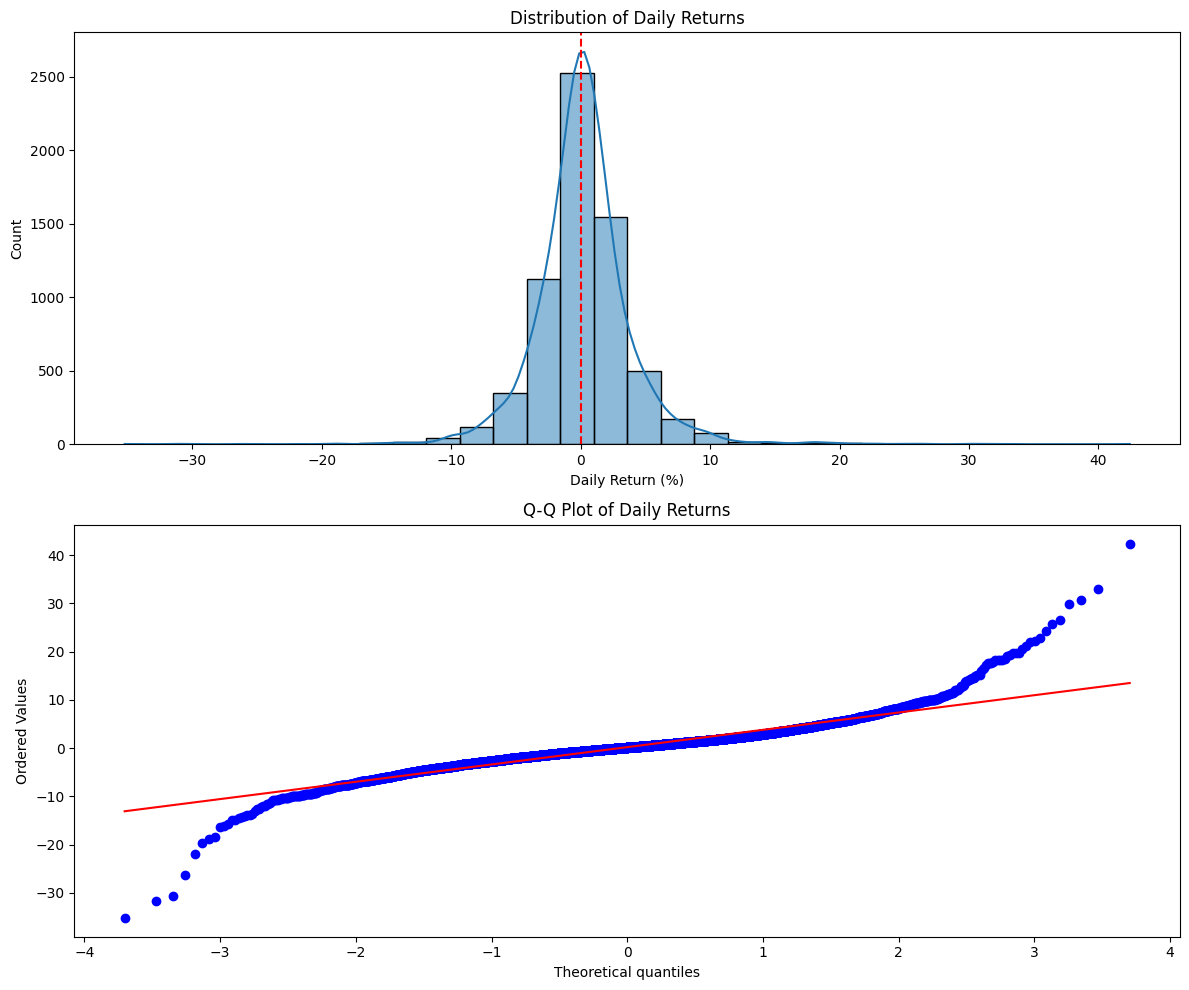

In [170]:
stockDF['Returns'] = stockDF['Close'].pct_change() * 100

fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Histogram
sns.histplot(stockDF['Returns'].dropna(), kde=True, ax=axes[0], bins=30)
axes[0].set_title('Distribution of Daily Returns')
axes[0].set_xlabel('Daily Return (%)')
axes[0].axvline(x=0, color='r', linestyle='--')

stats.probplot(stockDF['Returns'].dropna(), plot=axes[1])
axes[1].set_title('Q-Q Plot of Daily Returns')

plt.tight_layout()

In [171]:
skew_value = stockDF['Returns'].skew()

print(f"Skewness: {skew_value:.2f}")

Skewness: 0.61


From the skewness value, we can determine that the distribution is right skewed since the value is >0. This can mean that there are many smaller returns but there are days where the returns are bigger, hence making the mean higher.

For the QQ Plot, we see that the points do follow the reference line for the most part which shows it is normally distributed, and then moving away at the ends. Since it moves away at the ends, it can indicate the volatility of the market